# AML_2019 Coursework, Gradient Descent, Group 9

Sources: Alan Chalk, https://github.com/alanchalk/aml_2019_gd/blob/master/gd.py

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from mpl_toolkits import mplot3d

### Plain Vanilla:
Create a class which generates gradient descent:

fn_loss: the loss function to be minimised

fn_grad: the gradient of the loss function

In [2]:
class gd_2d_plain:
    
    def __init__(self,fn_loss,fn_grad):
        self.fn_loss = fn_loss
        self.fn_grad = fn_grad
    
    def find_min(self, x_init, eta, tol):
        x = x_init
        
        loss_path = []
        x_path = []
        
        x_path.append(x)
        loss_this = self.fn_loss(x[0],x[1])
        loss_path.append(loss_this)
        g = self.fn_grad(x[0],x[1])
        n_iter = 0
        
        while g[0]>tol or g[1]>tol:
            g = self.fn_grad(x[0],x[1])
            x[0] += -eta[0]*g[0]
            x[1] += -eta[1]*g[1]
            x = [x[0],x[1]]
            x_path.append(x)
            loss_this = self.fn_loss(x[0],x[1])
            loss_path.append(loss_this)
            n_iter += 1
        
        self.loss_path = loss_path
        self.x_path = x_path
        self.loss_fn_min = loss_this
        self.x_at_min = x
        self.n_iter = n_iter

Three-Hump Camel Function

In [3]:
def fn_loss(x_0,x_1):
    return 2*(x_0**2)-1.05*(x_0**4)+(x_0**6)/6+x_0*x_1+x_1**2

def fn_grad(x_0,x_1):
    delta_0 = 4*x_0 - 4.2*(x_0**3)+x_0**5+x_1
    delta_1 = x_0+2*x_1
    return np.array([delta_0,delta_1])

In [4]:
solver = gd_2d_plain(fn_loss = fn_loss, fn_grad = fn_grad)

In [5]:
solver.find_min(x_init=[1,1], eta = [0.001, 0.001], tol = 1e-3)

In [6]:
print('The minimum of the loss function is {0}.'.format(solver.loss_fn_min))
print('The number of iterations to find minimum is {0}.'.format(solver.n_iter))
print('The value of x which gives the minimum is {0}'.format(solver.x_at_min))  

The minimum of the loss function is 3.678562529778963e-07.
The number of iterations to find minimum is 3908.
The value of x which gives the minimum is [-0.00026060006176020594, 0.0006293086194726275]


Text(0.5, 0, 'loss path')

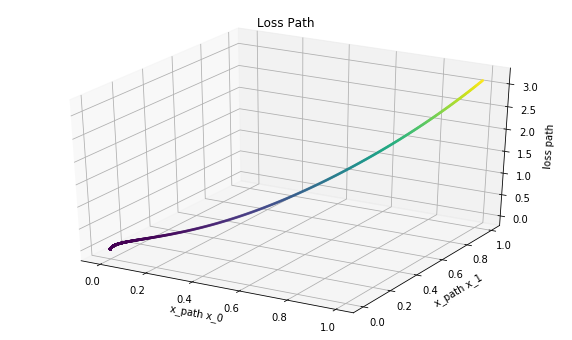

In [7]:
#Loss Path Graph
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection ='3d')

x0_path = np.array(solver.x_path)[:,0]
x1_path = np.array(solver.x_path)[:,1]
z_1 = solver.loss_path

ax.scatter(x0_path,x1_path,z_1,c=z_1,s=3)
ax.set_title('Loss Path')
ax.set_xlabel('x_path x_0')
ax.set_ylabel('x_path x_1')
ax.set_zlabel('loss path')

3D Plot:

Text(0.5, 0, 'z')

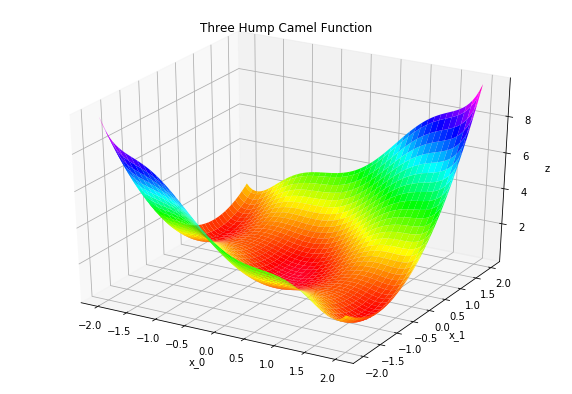

In [8]:
x = np.linspace(-2,2,80)
y = np.linspace(-2,2,80)
x,y = np.meshgrid(x,y)
z = fn_loss(x,y)

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection ='3d')

ax.plot_surface(x,y,z,cmap=cm.gist_rainbow)
ax.set_title('Three Hump Camel Function')
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('z')



**Change initial point or step size to see path differences:**

In [9]:
solver.find_min(x_init=[2,2], eta = [0.001, 0.001], tol = 1e-3)
print('The minimum of the loss function is {0}.'.format(solver.loss_fn_min))
print('The number of iterations to find minimum is {0}.'.format(solver.n_iter))
print('The value of x which gives the minimum is {0}'.format(solver.x_at_min))

The minimum of the loss function is 0.29863870635619183.
The number of iterations to find minimum is 4546.
The value of x which gives the minimum is [1.7475011736524486, -0.8732517247290729]


Text(0.5, 0, 'loss path')

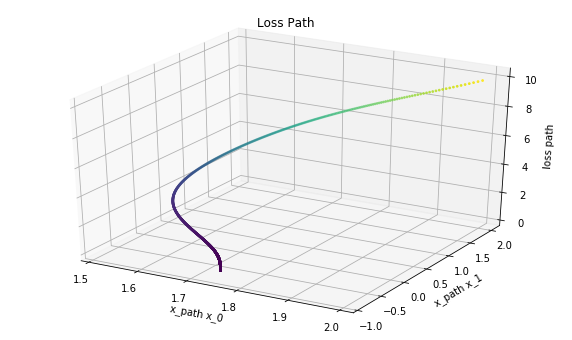

In [10]:
#Loss Path Graph
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection ='3d')

x0_path = np.array(solver.x_path)[:,0]
x1_path = np.array(solver.x_path)[:,1]
z_1 = solver.loss_path

ax.scatter(x0_path,x1_path,z_1,c=z_1,s=3)
ax.set_title('Loss Path')
ax.set_xlabel('x_path x_0')
ax.set_ylabel('x_path x_1')
ax.set_zlabel('loss path')

In [11]:
solver.find_min(x_init=[2,2], eta = [0.1, 0.1], tol = 1e-3)
print('The minimum of the loss function is {0}.'.format(solver.loss_fn_min))
print('The number of iterations to find minimum is {0}.'.format(solver.n_iter))
print('The value of x which gives the minimum is {0}'.format(solver.x_at_min))

The minimum of the loss function is 1.9007073033109484e-07.
The number of iterations to find minimum is 37.
The value of x which gives the minimum is [-0.00018736138505281123, 0.00045234240857571135]


In [12]:
solver.find_min(x_init=[1,1], eta = [1, 1], tol = 1e-3)
print('The minimum of the loss function is {0}.'.format(solver.loss_fn_min))
print('The number of iterations to find minimum is {0}.'.format(solver.n_iter))
print('The value of x which gives the minimum is {0}'.format(solver.x_at_min))

The minimum of the loss function is 30.858768544518576.
The number of iterations to find minimum is 2.
The value of x which gives the minimum is [2.5772800000000005, 2.8]


**Conclusion:**

The global minimum of Three-Hump Camel Function is [0,0] with another two local minimum points. We firstly set step size as 0.001, it takes 3908 steps to reach the global minimum point. However, when change the initial point, it stops at the local minimum point. By increasing the step size, it goes back to global minimum point. This is due to the issue of plain vanilla gradient decent. When the step size is too small, the process will stop at saddle point where the gradient is zero but it is not the minimum. However, if we increase the step size to 1, we can see from the result that the process diverges and stops at anypoint where has a zero gradient.

### Momentum

In [13]:
class gd_2d_momentum:
    
    def __init__(self, fn_loss, fn_grad):
        self.fn_loss = fn_loss
        self.fn_grad = fn_grad
    
    def momentum(self, x_init, eta, tol, alpha):
        x = x_init
        
        loss_path = []
        x_path = []
        
        x_path.append(x)
        loss_this = self.fn_loss(x[0],x[1])
        loss_path.append(loss_this)
        g = self.fn_grad(x[0],x[1])
        v = [0,0]
        n_iter = 0
        
        while g[0]>tol or g[1]>tol:
            g = self.fn_grad(x[0],x[1])
            v[0] = alpha*v[0] + eta[0]*g[0]
            v[1] = alpha*v[1] + eta[1]*g[1]
            v = [v[0],v[1]]
            x[0] += -v[0]
            x[1] += -v[1]
            x=[x[0],x[1]]
            x_path.append(x)
            loss_this = self.fn_loss(x[0],x[1])
            loss_path.append(loss_this)
            n_iter += 1
        
        self.loss_path = np.array(loss_path)
        self.x_path = np.array(x_path)
        self.loss_fn_min = loss_this
        self.x_at_min = x
        self.n_iter = n_iter

In [14]:
solver_m = gd_2d_momentum(fn_loss, fn_grad)

In [15]:
solver_m.momentum(x_init=[1,1], eta = [0.001, 0.001], tol = 1e-3,alpha = 0.9)

In [16]:
print('The minimum of the loss function is {0}'.format(solver_m.loss_fn_min))
print('The number of iterations to find minimum is {0}.'.format(solver_m.n_iter))
print('The value of x which gives the minimum is {0}'.format(solver_m.x_at_min))               

The minimum of the loss function is 0.0007232402390379058
The number of iterations to find minimum is 100.
The value of x which gives the minimum is [-0.020330334855850653, 0.010489517057258993]


Text(0.5, 0, 'loss path')

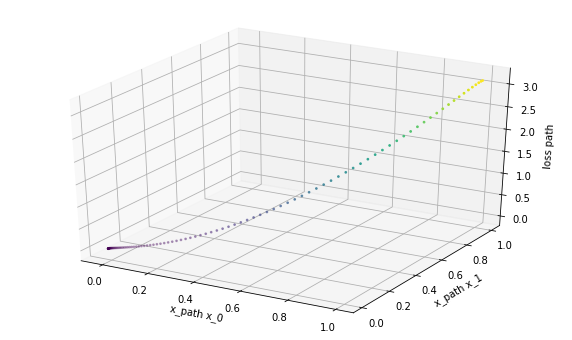

In [17]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection ='3d')

x0_path = np.array(solver_m.x_path)[:,0]
x1_path = np.array(solver_m.x_path)[:,1]
z_1 = solver_m.loss_path

ax.scatter(x0_path,x1_path,z_1,c=z_1,s=3)
ax.set_xlabel('x_path x_0')
ax.set_ylabel('x_path x_1')
ax.set_zlabel('loss path')

### Nesterov's Accelerated Gradient (NAG)

In [18]:
class gd_2d_nag:
    
    def __init__(self, fn_loss, fn_grad):
        self.fn_loss = fn_loss
        self.fn_grad = fn_grad
    
    def nag(self, x_init, eta, tol, alpha):
        x = x_init
        
        loss_path = []
        x_path = []
        
        x_path.append(x)
        loss_this = self.fn_loss(x[0],x[1])
        loss_path.append(loss_this)
        g = self.fn_grad(x[0],x[1])
        nu = [0,0]
        n_iter = 0
        
        while g[0]>tol or g[1]>tol:
            mu = 1 - 3/(n_iter+1+5)
            g = self.fn_grad(x[0]-mu*nu[0],x[1]-mu*nu[1])
            nu[0] = alpha*nu[0] + eta[0]*g[0]
            nu[1]= alpha*nu[1] + eta[1]*g[1]
            nu = [nu[0],nu[1]]
            x[0] += -nu[0]
            x[1] += -nu[1]
            x = [x[0],x[1]]
            x_path.append(x)
            loss_this = self.fn_loss(x[0],x[1])
            loss_path.append(loss_this)
            n_iter += 1
            
        self.loss_path = np.array(loss_path)
        self.x_path = np.array(x_path)
        self.loss_fn_min = loss_this
        self.x_at_min = x
        self.n_iter = n_iter

In [19]:
solver_n = gd_2d_nag(fn_loss, fn_grad)

In [20]:
solver_n.nag(x_init=[1,1], eta = [0.001, 0.001], tol = 1e-3,alpha = 0.9)

In [21]:
print('The minimum of the loss function is {0}'.format(solver_n.loss_fn_min))
print('The number of iterations to find minimum is {0}.'.format(solver_n.n_iter))
print('The value of x which gives the minimum is {0}'.format(solver_n.x_at_min))

The minimum of the loss function is 3.62339981567217e-07
The number of iterations to find minimum is 288.
The value of x which gives the minimum is [-0.00025918839949643847, 0.0006243440254653828]


Text(0.5, 0, 'loss path')

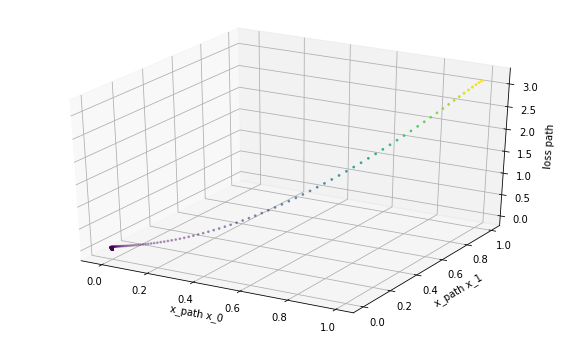

In [23]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection ='3d')

x0_path = np.array(solver_n.x_path)[:,0]
x1_path = np.array(solver_n.x_path)[:,1]
z_1 = solver_n.loss_path

ax.scatter(x0_path,x1_path,z_1,c=z_1,s=3)
ax.set_xlabel('x_path x_0')
ax.set_ylabel('x_path x_1')
ax.set_zlabel('loss path')

**Conclusion:**



We experiment with another two types of gradient descent, Momentum and Nesterov's Accelerated Gradient (NAG). There is a new item is included in both methods, a hyper prameter(alpha), representing how much we take part previous gradient. Based on plain vanilla, momentum method takes direction of previous gradients in the updating process at each iteration, so the process will reach minimum faster and can avoid stucking at the saddle point. NAG is very close to Memntum. It calculates gradient ahead with interim parameters, and then update the values in the same way of Momentum. We can see that both methods take less steps to reach minimum comparing with plain vanilla and the NAG's result is more accurate and closer to the global minimum point comparing with Momentum.